<a href="https://colab.research.google.com/github/mahdimalverdi/Bigdata-hw5/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

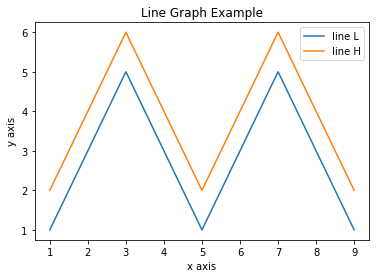

In [13]:
import matplotlib.pyplot as plt
 
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

In [2]:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

In [17]:
!wget -q https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-apr14.csv
!wget -q https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-aug14.csv
!wget -q https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-jul14.csv
!wget -q https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-jun14.csv
!wget -q https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-may14.csv
!wget -q https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-sep14.csv

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [8]:
import findspark
findspark.init()

In [9]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DoubleType
from pyspark.sql.types import ArrayType, DoubleType, BooleanType
from pyspark.sql.functions import col,array_contains
spark = SparkSession.builder.master("local[1]").appName("hw6").getOrCreate()

In [10]:
from pyspark.sql import SparkSession, DataFrame, functions as F
from pyspark.ml.feature import Imputer, StringIndexer, VectorIndexer, VectorAssembler, OneHotEncoderEstimator, PCA, Bucketizer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

import pandas as pd
import pandas_profiling
import os

In [11]:
import os
import pandas as pd
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
from pyspark.sql.functions import udf, col
import pyspark.sql.functions as F

from pyspark.ml.feature import VectorAssembler

from pyspark.ml.clustering import KMeans, BisectingKMeans, GaussianMixture

In [12]:
# setting random seed for notebook reproducability
rnd_seed=42
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

In [44]:
# Load training data
import datetime
uber_df = spark.read.csv(path="*.csv", header=True)
uber_df.cache()
uber_df.show()

def convertCase(text):
  return str(datetime.datetime.strptime(text, '%m/%d/%Y %H:%M:%S')) 

convertUDF = udf(lambda z: convertCase(z))
uber_df = uber_df.withColumn("dt",convertUDF(col("Date/Time")) ).withColumn("lat", col("Lat").cast('Double')).withColumn("lon", col("Lon").cast('Double')).withColumn("base", uber_df["Base"]).select(['dt','lat','lon','base'])
uber_df.show()
print(uber_df.schema)


+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|9/1/2014 0:01:00|40.2201|-74.0021|B02512|
|9/1/2014 0:01:00|  40.75|-74.0027|B02512|
|9/1/2014 0:03:00|40.7559|-73.9864|B02512|
|9/1/2014 0:06:00| 40.745|-73.9889|B02512|
|9/1/2014 0:11:00|40.8145|-73.9444|B02512|
|9/1/2014 0:12:00|40.6735|-73.9918|B02512|
|9/1/2014 0:15:00|40.7471|-73.6472|B02512|
|9/1/2014 0:16:00|40.6613|-74.2691|B02512|
|9/1/2014 0:32:00|40.3745|-73.9999|B02512|
|9/1/2014 0:33:00|40.7633|-73.9773|B02512|
|9/1/2014 0:33:00|40.7467|-73.6131|B02512|
|9/1/2014 0:37:00|40.8105|  -73.96|B02512|
|9/1/2014 0:38:00| 40.679|-74.0111|B02512|
|9/1/2014 0:39:00|40.4023|-73.9839|B02512|
|9/1/2014 0:48:00|40.7378|-74.0395|B02512|
|9/1/2014 0:48:00|40.7214|-73.9884|B02512|
|9/1/2014 0:49:00|40.8646|-73.9081|B02512|
|9/1/2014 1:08:00|40.7398|-74.0061|B02512|
|9/1/2014 1:17:00|40.6793|-74.0116|B02512|
|9/1/2014 1:19:00|40.7328|-73.9875|B02512|
+----------

In [45]:
uber_df.describe(["dt", "lat", "lon"]).show()

+-------+-------------------+-------------------+-------------------+
|summary|                 dt|                lat|                lon|
+-------+-------------------+-------------------+-------------------+
|  count|            4534327|            4534327|            4534327|
|   mean|               null|  40.73926075400814| -73.97301934563038|
| stddev|               null|0.03994991057662093|0.05726669735470254|
|    min|2014-04-01 00:00:00|            39.6569|            -74.929|
|    max|2014-09-30 22:59:00|            42.1166|           -72.0666|
+-------+-------------------+-------------------+-------------------+



In [46]:
feature_columns = ['lat', 'lon']


In [47]:
feature_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")


In [48]:
uber_assembled_df = feature_assembler.transform(uber_df)
uber_assembled_df.cache()

DataFrame[dt: string, lat: double, lon: double, base: string, features: vector]

In [50]:
uber_assembled_df.show(10)


+-------------------+-------+--------+------+------------------+
|                 dt|    lat|     lon|  base|          features|
+-------------------+-------+--------+------+------------------+
|2014-09-01 00:01:00|40.2201|-74.0021|B02512|[40.2201,-74.0021]|
|2014-09-01 00:01:00|  40.75|-74.0027|B02512|  [40.75,-74.0027]|
|2014-09-01 00:03:00|40.7559|-73.9864|B02512|[40.7559,-73.9864]|
|2014-09-01 00:06:00| 40.745|-73.9889|B02512| [40.745,-73.9889]|
|2014-09-01 00:11:00|40.8145|-73.9444|B02512|[40.8145,-73.9444]|
|2014-09-01 00:12:00|40.6735|-73.9918|B02512|[40.6735,-73.9918]|
|2014-09-01 00:15:00|40.7471|-73.6472|B02512|[40.7471,-73.6472]|
|2014-09-01 00:16:00|40.6613|-74.2691|B02512|[40.6613,-74.2691]|
|2014-09-01 00:32:00|40.3745|-73.9999|B02512|[40.3745,-73.9999]|
|2014-09-01 00:33:00|40.7633|-73.9773|B02512|[40.7633,-73.9773]|
+-------------------+-------+--------+------+------------------+
only showing top 10 rows



In [51]:
train_df, test_df = uber_assembled_df.randomSplit([0.7, 0.3], seed=rnd_seed)
train_df.cache()
test_df.cache()

uber_df.unpersist()
uber_assembled_df.unpersist()

DataFrame[dt: string, lat: double, lon: double, base: string, features: vector]

In [52]:
kmeans = KMeans(k=8, initMode='k-means||', featuresCol='features', predictionCol='cluster', maxIter=10)


In [53]:
kmModel = kmeans.fit(train_df)


In [54]:
for center in kmModel.clusterCenters():
    print(center)

[ 40.73136247 -73.99806645]
[ 40.65859484 -73.78093055]
[ 40.9867636  -73.78442778]
[ 40.77591685 -73.47665146]
[ 40.68745578 -73.96467787]
[ 40.78184735 -73.88087384]
[ 40.69794925 -74.20237933]
[ 40.76660828 -73.97250738]


In [55]:
test_preds = kmModel.transform(test_df)
test_preds.cache()

DataFrame[dt: string, lat: double, lon: double, base: string, features: vector, cluster: int]

In [57]:
test_preds.show(10)


+-------------------+-------+--------+------+------------------+-------+
|                 dt|    lat|     lon|  base|          features|cluster|
+-------------------+-------+--------+------+------------------+-------+
|2014-07-01 00:00:00|40.7473|-73.9932|B02682|[40.7473,-73.9932]|      0|
|2014-07-01 00:00:00|40.7588|-73.9723|B02617|[40.7588,-73.9723]|      7|
|2014-07-01 00:00:00|40.8282| -73.915|B02682| [40.8282,-73.915]|      5|
|2014-07-01 00:04:00|40.7107|-73.8444|B02598|[40.7107,-73.8444]|      5|
|2014-07-01 00:04:00|40.7403|-74.0079|B02617|[40.7403,-74.0079]|      0|
|2014-07-01 00:06:00| 40.732|-73.9999|B02512| [40.732,-73.9999]|      0|
|2014-07-01 00:06:00|40.7455| -73.999|B02682| [40.7455,-73.999]|      0|
|2014-07-01 00:06:00|40.7513|-74.0066|B02598|[40.7513,-74.0066]|      0|
|2014-07-01 00:07:00| 40.722|-73.9873|B02617| [40.722,-73.9873]|      0|
|2014-07-01 00:07:00|40.7408|-74.0053|B02682|[40.7408,-74.0053]|      0|
+-------------------+-------+--------+------+------

In [58]:
print(kmModel.summary.clusterSizes)

[1327372, 95657, 8860, 6100, 400155, 146760, 31909, 1157115]


In [59]:
print(kmModel.computeCost(train_df))


2849.640524601148


In [60]:
kmModel.write().overwrite().save("data/model")


In [61]:
test_preds.createOrReplaceTempView("test_preds")


In [62]:
import re

def strip_margin(text):
    nomargin = re.sub('\n[ \t]*\|', ' ', text)
    trimmed = re.sub('\s+', ' ', nomargin)
    return trimmed

In [63]:
sql_result_df = spark.sql(strip_margin(
                        """SELECT 
                          |    HOUR(dt) AS hour, 
                          |    cluster,
                          |    COUNT(*) as count
                          |FROM test_preds
                          |GROUP BY hour, cluster
                          |ORDER BY count DESC
                        """))
sql_result_df.cache()

DataFrame[hour: int, cluster: int, count: bigint]

In [64]:
sql_result_df.show(10)


+----+-------+-----+
|hour|cluster|count|
+----+-------+-----+
|  17|      0|42833|
|  18|      0|41349|
|  17|      7|41184|
|  16|      0|39000|
|  16|      7|38972|
|  18|      7|38573|
|  21|      0|37358|
|  19|      0|37232|
|  20|      0|36061|
|  22|      0|34637|
+----+-------+-----+
only showing top 10 rows



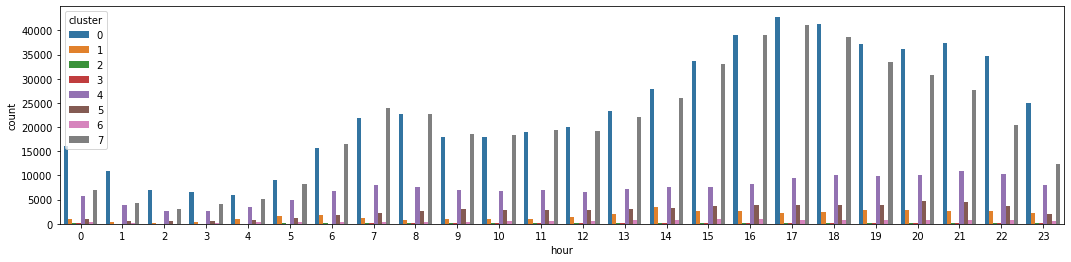

In [67]:
plt.figure(figsize=(18,4))
sns.barplot(x="hour", y="count", hue="cluster", data=sql_result_df.toPandas());


In [68]:
sql_result_df.unpersist()

DataFrame[hour: int, cluster: int, count: bigint]

In [69]:
(test_preds
    .select(F.hour("dt").alias("hour"), "cluster")
    .groupBy(["hour", "cluster"])
    .count()
    .orderBy(F.desc("count"))).show(10)

+----+-------+-----+
|hour|cluster|count|
+----+-------+-----+
|  17|      0|42833|
|  18|      0|41349|
|  17|      7|41184|
|  16|      0|39000|
|  16|      7|38972|
|  18|      7|38573|
|  21|      0|37358|
|  19|      0|37232|
|  20|      0|36061|
|  22|      0|34637|
+----+-------+-----+
only showing top 10 rows



In [70]:
sql_result_df = spark.sql(strip_margin(
                        """SELECT cluster, COUNT(cluster) AS count
                          |FROM test_preds
                          |GROUP BY cluster
                          |ORDER BY cluster
                        """))
sql_result_df.cache()

DataFrame[cluster: int, count: bigint]

In [71]:
sql_result_df.show(10)

+-------+------+
|cluster| count|
+-------+------+
|      0|569222|
|      1| 41101|
|      2|  3726|
|      3|  2651|
|      4|172518|
|      5| 63097|
|      6| 13431|
|      7|494653|
+-------+------+



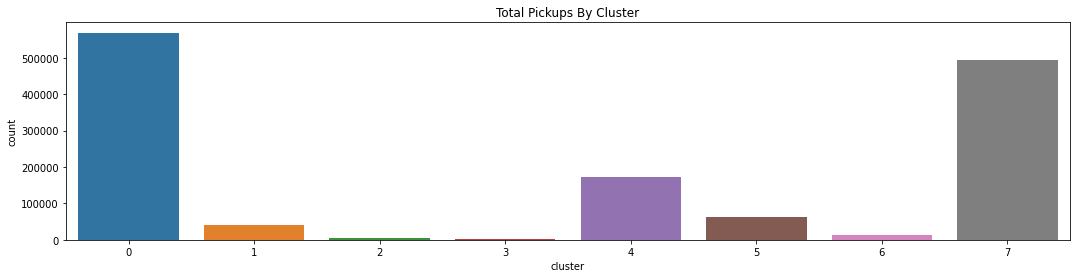

In [72]:
plt.figure(figsize=(18,4))
sns.barplot(x="cluster", y="count", data=sql_result_df.toPandas())
plt.title("Total Pickups By Cluster");

In [73]:
sql_result_df.unpersist()

DataFrame[cluster: int, count: bigint]

In [74]:
(test_preds
    .groupBy("cluster")
    .count()
    .orderBy("cluster")).show(10)

+-------+------+
|cluster| count|
+-------+------+
|      0|569222|
|      1| 41101|
|      2|  3726|
|      3|  2651|
|      4|172518|
|      5| 63097|
|      6| 13431|
|      7|494653|
+-------+------+



In [75]:
sql_result_df = spark.sql(strip_margin(
                        """SELECT 
                          |    HOUR(dt) AS hour, 
                          |    COUNT(cluster) AS count
                          |FROM test_preds
                          |GROUP BY hour
                          |ORDER BY hour
                        """))
sql_result_df.cache()

DataFrame[hour: int, count: bigint]

In [76]:
sql_result_df.show(10)

+----+-----+
|hour|count|
+----+-----+
|   0|31308|
|   1|20219|
|   2|13593|
|   3|14375|
|   4|16597|
|   5|25331|
|   6|43017|
|   7|57878|
|   8|57017|
|   9|48039|
+----+-----+
only showing top 10 rows



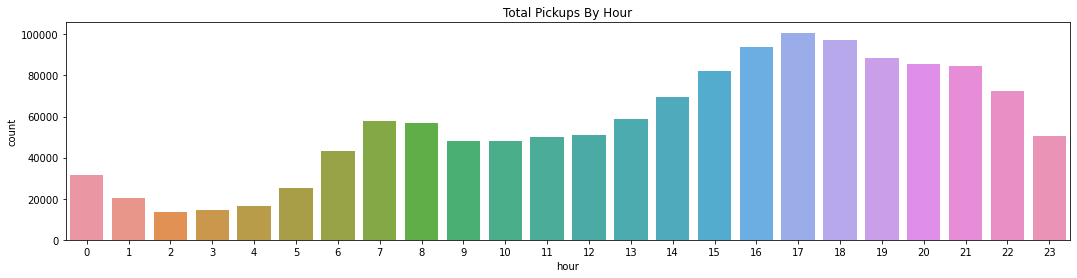

In [77]:
plt.figure(figsize=(18,4))
sns.barplot(x="hour", y="count", data=sql_result_df.toPandas())
plt.title("Total Pickups By Hour");

In [78]:
sql_result_df.unpersist()

DataFrame[hour: int, count: bigint]

In [79]:
(test_preds
    .select(F.hour("dt").alias("hour"))
    .groupBy("hour")
    .count()
    .orderBy("hour")).show(10)

+----+-----+
|hour|count|
+----+-----+
|   0|31308|
|   1|20219|
|   2|13593|
|   3|14375|
|   4|16597|
|   5|25331|
|   6|43017|
|   7|57878|
|   8|57017|
|   9|48039|
+----+-----+
only showing top 10 rows

